In [2]:
# ====================================
# 📦 Step 1: Install & Import Libraries
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better visuals
sns.set(style="whitegrid", palette="muted")
import warnings
warnings.filterwarnings("ignore")

# ====================================
# 📂 Step 2: Load Dataset (after upload)
# ====================================
from google.colab import files
uploaded = files.upload()

# Load the CSV file (adjust filename if needed)
df = pd.read_csv("mental-health-in-tech-survey.csv")
print("Dataset Loaded Successfully!")





Saving mental-health-in-tech-survey.csv to mental-health-in-tech-survey.csv
Dataset Loaded Successfully!


In [3]:
# ====================================
# 🧹 Step 3: Initial Cleaning
# ====================================
print("Initial Shape:", df.shape)
df.head()

# Drop unnecessary columns (adjust as needed)
df.drop(columns=["comments", "state", "Timestamp"], inplace=True, errors='ignore')

# Basic info
df.info()

# Missing values overview
missing = df.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# ====================================
# 📊 Step 4: EDA - Summary Statistics
# ====================================
print("Descriptive Stats:\n", df.describe(include='all'))

Initial Shape: (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-n

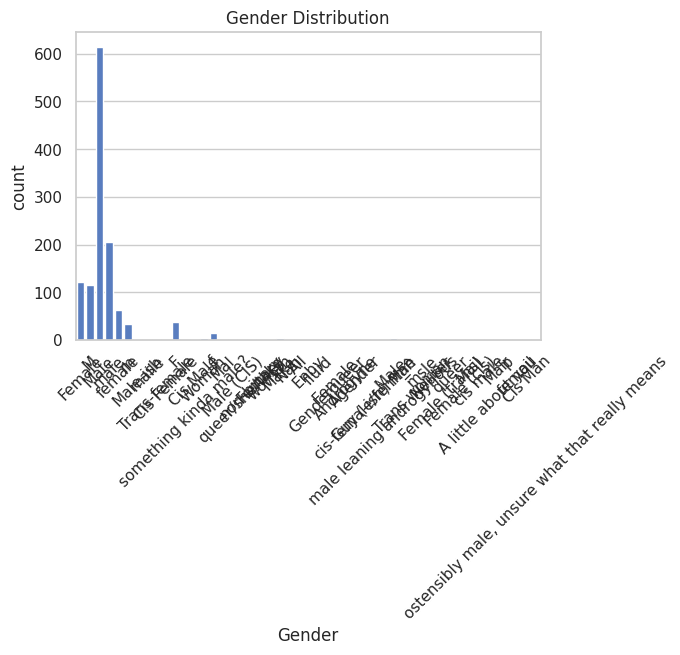

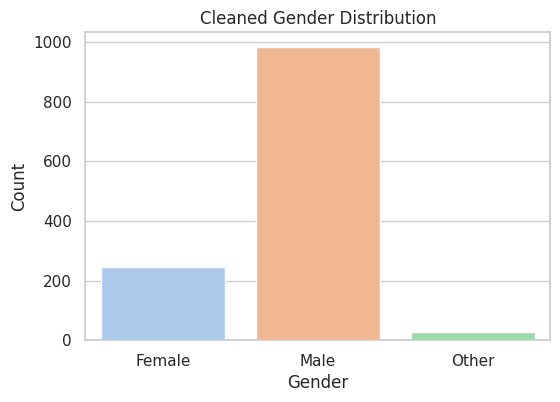

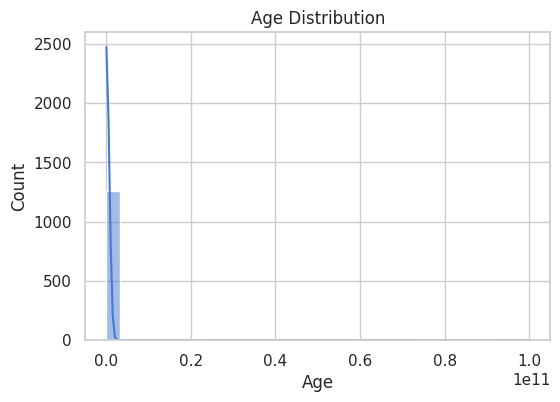

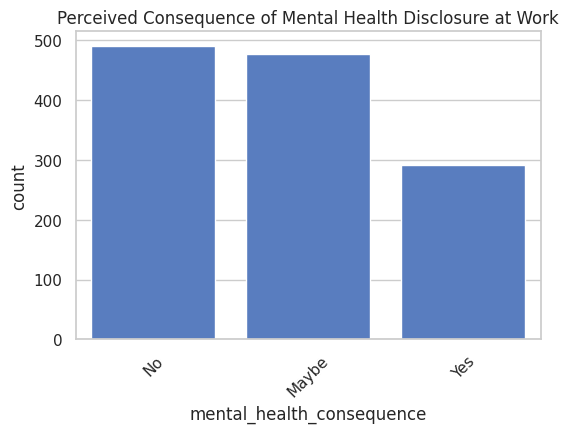

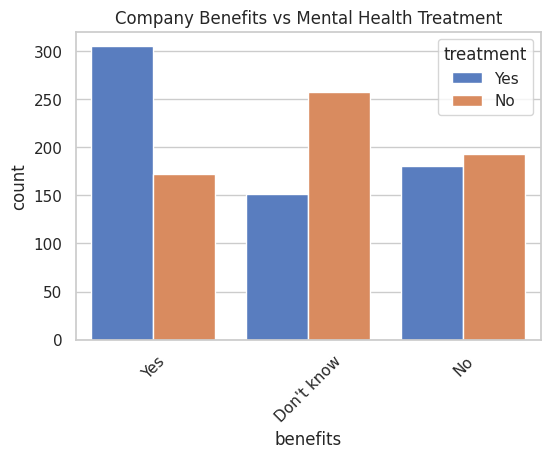


Initial Observations:
- Gender diversity is skewed (consider cleaning unusual entries).
- Some entries in Age may be outliers (e.g., below 18 or above 70).
- Diagnosis labels appear useful for classification.
- Employer support may correlate with diagnosis status.


In [4]:

# ====================================
# 📈 Step 5: Visual Explorations
# ====================================

# 1. Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.xticks(rotation=45)
plt.show()

# Clean and group gender entries
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'male (cis)', 'msle', 'malr', 'mail', 'cis man']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'female (cis)', 'femake', 'cis-female/femme', 'female ']:
        return 'Female'
    else:
        return 'Other'

# Apply the function
df['Gender_Cleaned'] = df['Gender'].apply(clean_gender)

# Plot cleaned gender distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender_Cleaned', palette='pastel')
plt.title("Cleaned Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# 2. Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# 3. Mental Health Diagnosis
plt.figure(figsize=(6,4))
sns.countplot(x='mental_health_consequence', data=df)
plt.title("Perceived Consequence of Mental Health Disclosure at Work")
plt.xticks(rotation=45)
plt.show()

# 4. Company Support vs Mental Health (Fixed version)
plt.figure(figsize=(6,4))
sns.countplot(x='benefits', hue='treatment', data=df)
plt.title("Company Benefits vs Mental Health Treatment")
plt.xticks(rotation=45)
plt.show()


# ====================================
# 📌 Step 6: Initial Observations
# ====================================
print("\nInitial Observations:")
print("- Gender diversity is skewed (consider cleaning unusual entries).")
print("- Some entries in Age may be outliers (e.g., below 18 or above 70).")
print("- Diagnosis labels appear useful for classification.")
print("- Employer support may correlate with diagnosis status.")

# You can now continue with:
# - Data cleaning (age filtering, encoding categories)
# - Feature engineering
# - Model development (Logistic Regression, Random Forest, etc.)

In [5]:
# ====================================
# 🧠 Step 7: Prepare Data for Modeling
# ====================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features and drop rows with missing values
features = ['Age', 'Gender_Cleaned', 'family_history', 'benefits', 'care_options',
            'seek_help', 'anonymity', 'leave', 'treatment']
df_model = df[features].dropna()

# Label encode categorical features
le = LabelEncoder()
for col in ['Gender_Cleaned', 'family_history', 'benefits', 'care_options', 'seek_help', 'anonymity', 'leave']:
    df_model[col] = le.fit_transform(df_model[col])

# Encode target variable
df_model['treatment'] = df_model['treatment'].map({'Yes': 1, 'No': 0})

# Split into features and target
X = df_model.drop('treatment', axis=1)
y = df_model['treatment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# ====================================
# 🤖 Step 8: Train First Model
# ====================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [7]:
# ====================================
# 📈 Step 9: Evaluate Model
# ====================================
print("🔍 Model Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🔍 Model Accuracy: 49.21 %

Confusion Matrix:
 [[  8 121]
 [  7 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.06      0.11       129
           1       0.49      0.94      0.64       123

    accuracy                           0.49       252
   macro avg       0.51      0.50      0.38       252
weighted avg       0.51      0.49      0.37       252



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

# Evaluate with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} Accuracy: {round(scores.mean() * 100, 2)}% (+/- {round(scores.std() * 100, 2)})")


Logistic Regression Accuracy: 62.98% (+/- 8.64)
Random Forest Accuracy: 63.07% (+/- 1.82)
Support Vector Machine Accuracy: 52.58% (+/- 4.07)


In [9]:
# Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate tuned model
y_pred_rf = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest Accuracy: 67.06 %

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68       129
           1       0.66      0.67      0.66       123

    accuracy                           0.67       252
   macro avg       0.67      0.67      0.67       252
weighted avg       0.67      0.67      0.67       252



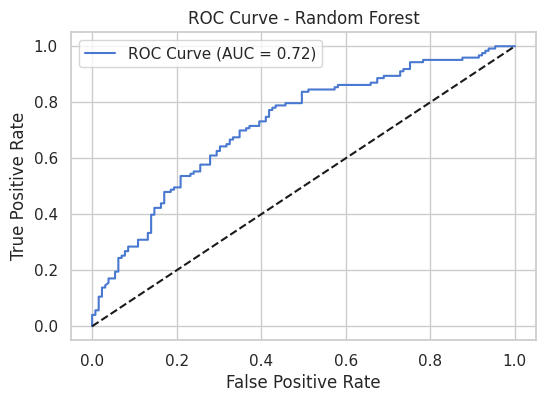

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()



Evaluating Models with Improved Data:
Logistic Regression Accuracy: 69.34% (+/- 1.54)
Random Forest Accuracy: 64.89% (+/- 3.61)
Support Vector Machine Accuracy: 69.1% (+/- 2.48)
Gradient Boosting Accuracy: 69.58% (+/- 1.49)

Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Tuned Gradient Boosting Accuracy: 68.25 %

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       129
           1       0.65      0.74      0.69       123

    accuracy                           0.68       252
   macro avg       0.69      0.68      0.68       252
weighted avg       0.69      0.68      0.68       252



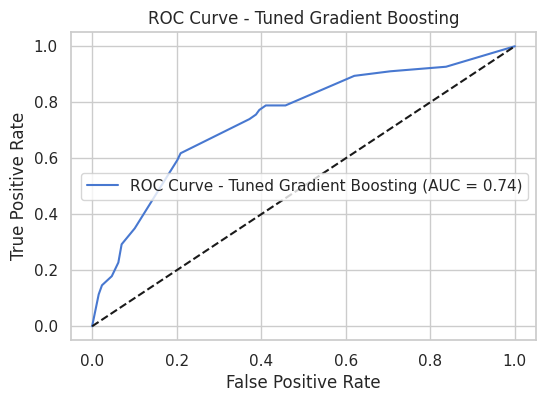

In [11]:
# ====================================
# ✨ Step 10: Improve Model Performance
# ====================================

# Addressing Potential Overfitting (if needed)
# If you suspect overfitting, you could try adding more data (if available),
# simplifying the model, or using regularization. For Random Forest,
# regularization is less common than for linear models, but you could explore
# reducing the number of trees or limiting the depth more aggressively
# than in the previous Grid Search.

# Feature Engineering Example: Create a new feature from age
# You already have Age, but you could categorize it into age groups.
def age_group(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 40:
        return 'Adult'
    else:
        return 'Older'

df['Age_Group'] = df['Age'].apply(age_group)

# Re-prepare the data with the new feature (and handle missing values)
features_improved = ['Age_Group', 'Gender_Cleaned', 'family_history', 'benefits', 'care_options',
                     'seek_help', 'anonymity', 'leave', 'treatment']
df_model_improved = df[features_improved].dropna()

# Label encode categorical features including the new one
le_improved = LabelEncoder()
for col in ['Age_Group', 'Gender_Cleaned', 'family_history', 'benefits', 'care_options', 'seek_help', 'anonymity', 'leave']:
    df_model_improved[col] = le_improved.fit_transform(df_model_improved[col])

# Encode target variable
df_model_improved['treatment'] = df_model_improved['treatment'].map({'Yes': 1, 'No': 0})

# Split into features and target
X_improved = df_model_improved.drop('treatment', axis=1)
y_improved = df_model_improved['treatment']

# Train/test split with the improved data
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(X_improved, y_improved, test_size=0.2, random_state=42)

# Explore More Models: Let's add a Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier

models_improved = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True), # probability=True needed for ROC curve
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate improved models with cross-validation
print("\nEvaluating Models with Improved Data:")
for name, model in models_improved.items():
    scores = cross_val_score(model, X_improved, y_improved, cv=5)
    print(f"{name} Accuracy: {round(scores.mean() * 100, 2)}% (+/- {round(scores.std() * 100, 2)})")

# Further Hyperparameter Tuning (Example for Gradient Boosting)
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_improved, y_train_improved)

print("\nBest Parameters for Gradient Boosting:", grid_search_gb.best_params_)
best_gb = grid_search_gb.best_estimator_

# Evaluate tuned Gradient Boosting model
y_pred_gb = best_gb.predict(X_test_improved)
print("Tuned Gradient Boosting Accuracy:", round(accuracy_score(y_test_improved, y_pred_gb) * 100, 2), "%")
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test_improved, y_pred_gb))

# Visualize ROC Curve for the best performing model (e.g., tuned Gradient Boosting)
y_proba_gb = best_gb.predict_proba(X_test_improved)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test_improved, y_proba_gb)

plt.figure(figsize=(6,4))
plt.plot(fpr_gb, tpr_gb, label='ROC Curve - Tuned Gradient Boosting (AUC = %.2f)' % roc_auc_score(y_test_improved, y_proba_gb))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Gradient Boosting')
plt.legend()
plt.show()